In [15]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.cluster import DBSCAN   
from sklearn.cluster import KMeans                              
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('music.csv')
df=df.drop(['Index'], axis=1)
df


,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [17]:
df1 = df.copy()
df2 = df.copy()

In [18]:
df=df.drop(['Title','Artist','Top Genre','Year'], axis=1)
df.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,201,94,3,71
1,135,79,50,-11,17,81,207,17,7,39
2,168,69,66,-9,7,52,341,2,17,69
3,173,96,43,-4,3,37,269,0,4,76
4,106,82,58,-5,10,87,256,1,3,59


In [19]:
df.isnull().sum()

Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [20]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df)

df_std = pd.DataFrame(df_scaled,columns=df.columns)
df_std

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1.312739,-1.340009,-0.015521,-1.368667,-0.479098,0.748080,-0.656580,2.245908,-0.453358,0.799653
1,0.527616,0.872304,-0.210991,-0.546064,-0.120314,1.271177,-0.592464,-0.408833,0.455637,-1.430623
2,1.705301,0.420812,0.831514,0.002338,-0.718286,0.104268,0.839452,-0.925990,2.728126,0.660261
3,1.883738,1.639841,-0.667086,1.373342,-0.957475,-0.499305,0.070064,-0.994944,-0.226109,1.148133
4,-0.507320,1.007752,0.310261,1.099141,-0.538895,1.512607,-0.068853,-0.960467,-0.453358,-0.036701
...,...,...,...,...,...,...,...,...,...,...
1989,-0.935569,-1.746352,1.092140,-0.820265,-0.479098,0.909033,-1.436653,1.901137,0.455637,0.242084
1990,1.955113,0.736856,-1.123182,0.276539,3.407722,1.834513,-1.351166,1.521888,0.228389,0.660261
1991,1.705301,0.917453,-0.015521,0.002338,0.716847,1.914989,-1.073331,1.556365,0.455637,1.008741
1992,1.919426,-1.520606,-0.536773,-1.094466,-0.718286,0.426174,0.657791,0.866822,-0.226109,0.381476


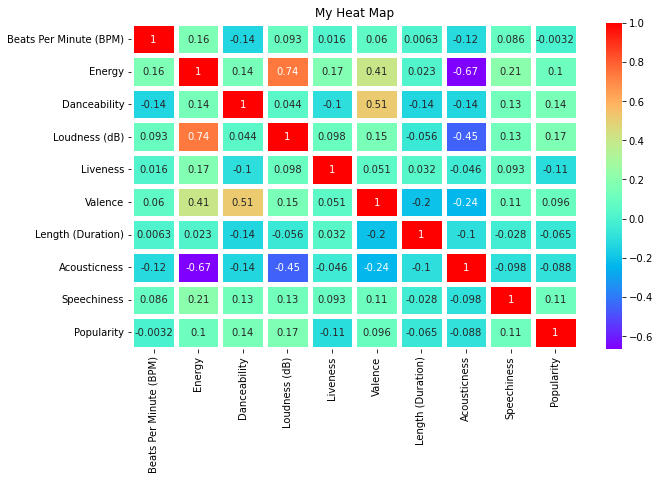

In [21]:
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df_std.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

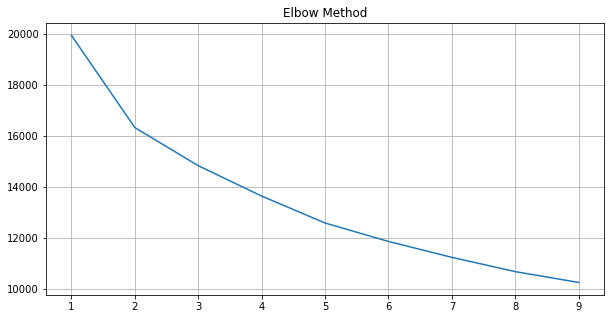

In [22]:
distortion = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df_std)
    distortion.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (10,5))
plt.plot(range(1,10), distortion)
plt.grid(True)
plt.title('Elbow Method')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.18527773195822392
For n_clusters = 3 The average silhouette_score is : 0.14602565311062743
For n_clusters = 4 The average silhouette_score is : 0.15247109754770477
For n_clusters = 5 The average silhouette_score is : 0.13685122466103464
For n_clusters = 6 The average silhouette_score is : 0.14996004412738437
For n_clusters = 7 The average silhouette_score is : 0.14417681051823197
For n_clusters = 8 The average silhouette_score is : 0.13338182342444832
For n_clusters = 9 The average silhouette_score is : 0.12744437332844438


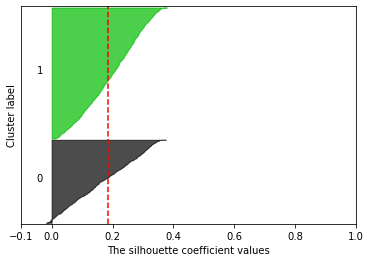

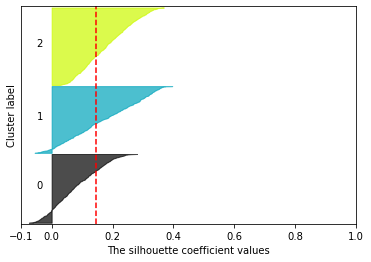

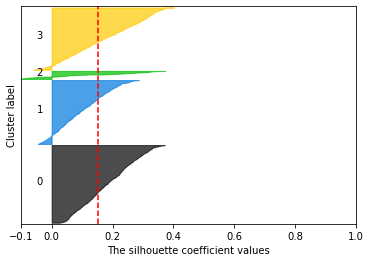

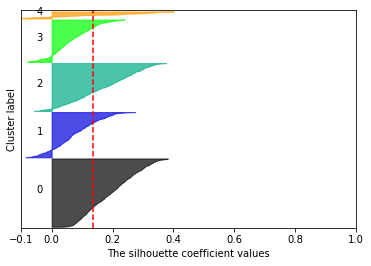

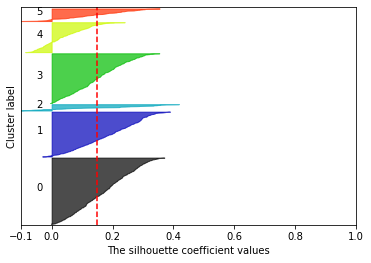

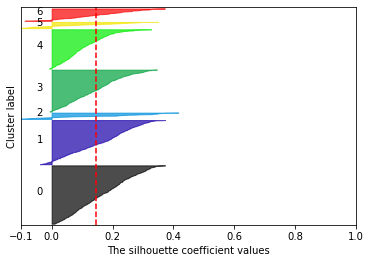

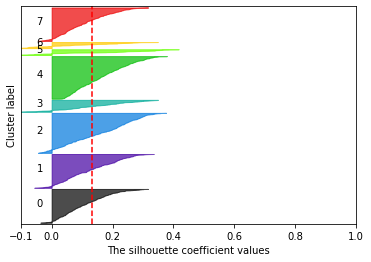

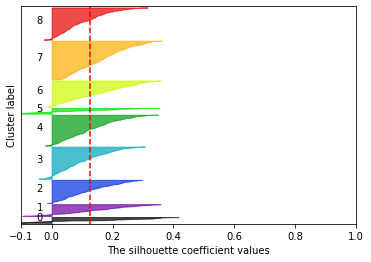

In [23]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_std)

    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)                 

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
    
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))                                                       
        y_lower = y_upper + 10                                         

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])                                          
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Here, the K=4 is turning out to be the best number of clusters.

Centroids : 
 [[ 0.74196623 -0.18133531]
 [-0.72354728  0.97915742]
 [-0.57284547 -0.41361995]
 [ 1.6448331  -1.4416938 ]]


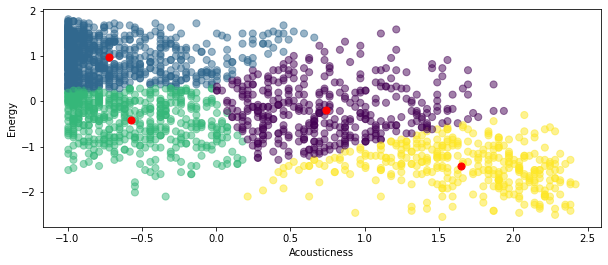

Centroids : 
 [[ 0.99444629  1.13326683]
 [-1.77650325 -1.4120519 ]
 [-0.3631008  -0.73764389]
 [ 0.24662576  0.30148345]]


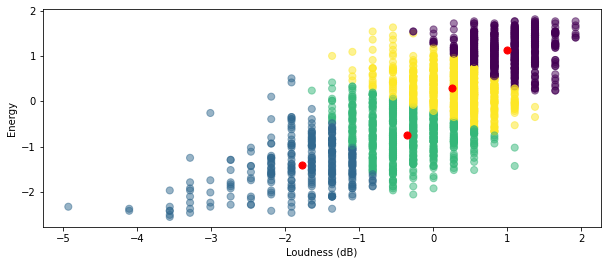

Centroids : 
 [[-1.2107635  -0.84298462]
 [-0.17131122  0.71616092]
 [ 1.20275098  1.13473242]
 [ 0.2710286  -0.71614878]]


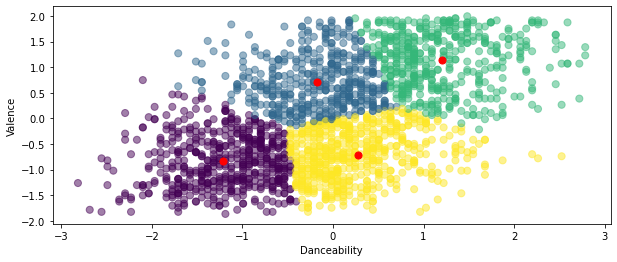

Centroids : 
 [[-1.14764455 -0.99287469]
 [ 0.8377931   1.15889856]
 [-0.53683965  0.52102896]
 [ 0.72025876 -0.55272644]]


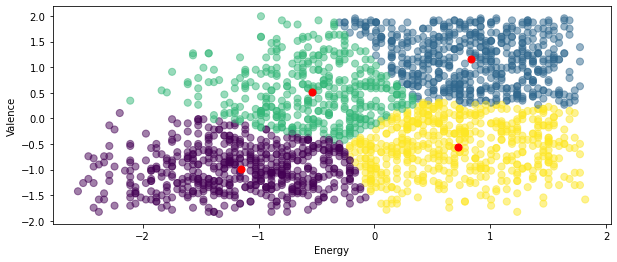

In [24]:
column1=['Acousticness','Loudness (dB)','Danceability','Energy']
column2=['Energy','Energy','Valence','Valence']

for x, y in zip(column1,column2):
    kmeans = KMeans(n_clusters=4, n_init=4, random_state = 3).fit(df_std[[x,y]])
    centroids = kmeans.cluster_centers_
    cluster = kmeans.fit_predict(df_std[[x,y]])
    df1[f'{x, y}'] = cluster
    print('Centroids : \n',centroids)
    fig, ax = plt.subplots(figsize=(10,4))
    plt.scatter(df_std[x], df_std[y], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [25]:
def recommendation(i):
    user=input('Enter the title or artist or genre: ')
    print(i.iloc[:,1:4][(i['Title']==user)|(i['Artist']==user)|(i['Top Genre']==user)])
    index=int(input('Enter the index :'))
    recommended = i.iloc[:,1:5][(i["('Acousticness', 'Energy')"]==(i["('Acousticness', 'Energy')"].iloc[index])) & (i["('Loudness (dB)', 'Energy')"]==(i["('Loudness (dB)', 'Energy')"].iloc[index])) & (i["('Danceability', 'Valence')"]==(i["('Danceability', 'Valence')"].loc[index])) & (i["('Energy', 'Valence')"]==(i["('Energy', 'Valence')"].loc[index]))]
    return pd.DataFrame(recommended)

In [26]:
recommendation(df1)

Enter the title or artist or genre: Sunrise
          Artist        Top Genre  Year
0    Norah Jones  adult standards  2004
356   Simply Red     british soul  2004
Enter the index :0


,Artist,Top Genre,Year,Beats Per Minute (BPM)
0,Norah Jones,adult standards,2004,157
440,Johnny Cash,arkansas country,2011,105
812,"Crosby, Stills, Nash & Young",album rock,1970,155
821,David Bowie,album rock,1970,118
899,Carpenters,adult standards,1972,184
921,John Denver,adult standards,1973,121
1854,The Beatles,british invasion,1965,117
1880,James Brown & The Famous Flames,motown,1966,81
1952,Neil Diamond,adult standards,1969,63
1992,The Dave Brubeck Quartet,bebop,1959,174


Centroids : 
 [[-1.14764455 -0.99287469]
 [ 0.8377931   1.15889856]
 [-0.53683965  0.52102896]
 [ 0.72025876 -0.55272644]]


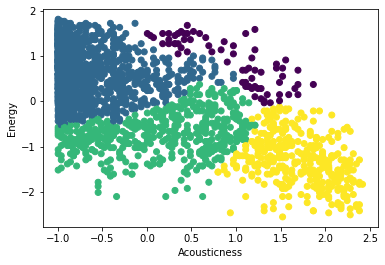

Centroids : 
 [[-1.14764455 -0.99287469]
 [ 0.8377931   1.15889856]
 [-0.53683965  0.52102896]
 [ 0.72025876 -0.55272644]]


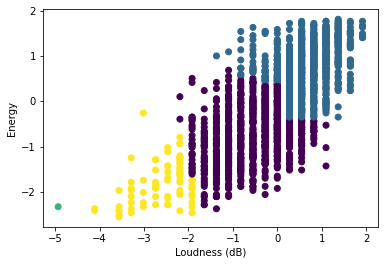

Centroids : 
 [[-1.14764455 -0.99287469]
 [ 0.8377931   1.15889856]
 [-0.53683965  0.52102896]
 [ 0.72025876 -0.55272644]]


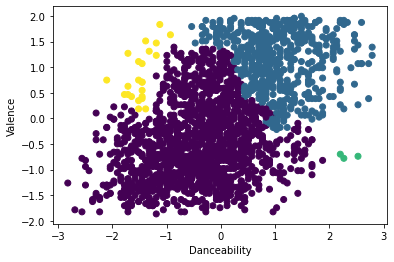

Centroids : 
 [[-1.14764455 -0.99287469]
 [ 0.8377931   1.15889856]
 [-0.53683965  0.52102896]
 [ 0.72025876 -0.55272644]]


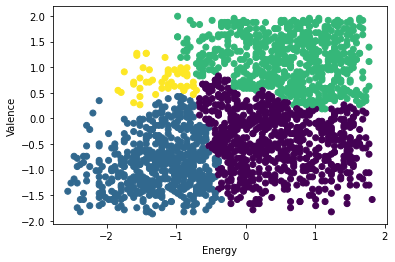

In [28]:
from sklearn.cluster import AgglomerativeClustering
column1=['Acousticness','Loudness (dB)','Danceability','Energy']
column2=['Energy','Energy','Valence','Valence']

for x, y in zip(column1,column2):
    model = AgglomerativeClustering(n_clusters=4, linkage='average')
    cluster = model.fit_predict(df_std[[x,y]])
    df2[f'{x, y}'] = cluster
    print('Centroids : \n',centroids)
    pred = model.fit_predict(df_std[[x,y]])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df_std[x], df_std[y], c= pred)
    plt.show()

In [30]:
recommendation(df2)

Enter the title or artist or genre: Sunrise
          Artist        Top Genre  Year
0    Norah Jones  adult standards  2004
356   Simply Red     british soul  2004
Enter the index :0


,Artist,Top Genre,Year,Beats Per Minute (BPM)
0,Norah Jones,adult standards,2004,157
812,"Crosby, Stills, Nash & Young",album rock,1970,155
889,Jim Croce,adult standards,1972,134
899,Carpenters,adult standards,1972,184
921,John Denver,adult standards,1973,121
1854,The Beatles,british invasion,1965,117
1879,The Beatles,british invasion,1966,81
1943,Etta James,adult standards,1968,83
1992,The Dave Brubeck Quartet,bebop,1959,174


Here, Kmeans is performing better as compared to agglomerative as Kmeans is making equal clusters.